## Importación de librerías y datos

Se importan las librerías generales de graficado (Seaborn, Matplotlib, Plotly), Pandas para procesamiento de datos y Zipfile para la extracción de los datos descargados

In [ ]:
import pandas as pd

pd.set_option('display.max_columns', None)

pd.set_option('display.max_rows', None)

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.gridspec as gridspec

import seaborn as sns

import plotly.express as px

import plotly.graph_objects as go

from plotly.subplots import make_subplots

import plotly.tools as tls
import plotly.offline as py

import warnings

warnings.filterwarnings("ignore")

import zipfile

Realizamos la carga de los datos por medio de la API de Kaggle

In [ ]:
try:
    df = pd.read_csv("loan.csv", on_bad_lines='skip')
    print("Datos cargados correctamente")
except pd.errors.ParserError as e:
    print(f"Error reading CSV: {e}")
    line_number = int(str(e).split('row ')[1].split(',')[0])
    df = pd.read_csv("loan.csv", skiprows=[line_number], on_bad_lines='skip')
    print(f"Skipped row {line_number} and continued loading.")

print(f"Número de filas en el dataset: {df.shape[0]}")
print(f"Columnas disponibles: {df.columns.tolist()}")

Datos cargados correctamente
Número de filas en el dataset: 887379
Columnas disponibles: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_del

In [ ]:
# Verificar la carga correcta de los datos
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocesado de los datos

## Eliminación de la categoría "JOINT"

Se analiza la distribución de tipos de crédito entre "INDIVIDUAL" y "JOINT"

Durante el análisis es evidente que el número de créditos de tipo "JOINT" es casi insignificante, por lo que se eliminan esta categoría y sus columnas relacionadas para facilitar el manejo de los datos en adelante

In [ ]:
# Conteo de valores según tipo de crédito
application_type_counts = df['application_type'].value_counts()

print('Conteo de créditos tipo "INDIVIDUAL"', application_type_counts[0])
print('Conteo de créditos tipo "JOINT"', application_type_counts[1])

Conteo de créditos tipo "INDIVIDUAL" 886868
Conteo de créditos tipo "JOINT" 511


In [ ]:
# Removemos todos los datos de categoría "JOINT"
# Además, removemos las columnas propias de esta categoría
df = df[df['application_type'] != 'JOINT']

columns_to_drop = [i for i in df.columns if 'joint' in i]

columns_to_drop.append('application_type')

df.drop(columns=columns_to_drop, inplace=True)

## Eliminación de columnas con demasiados nulos

Ciertas columnas del dataset contienen una enorme cantidad de datos nulos. Se buscan las columnas que cumplen con un criterio de >20% de datos nulos y se remueven del DataFrame

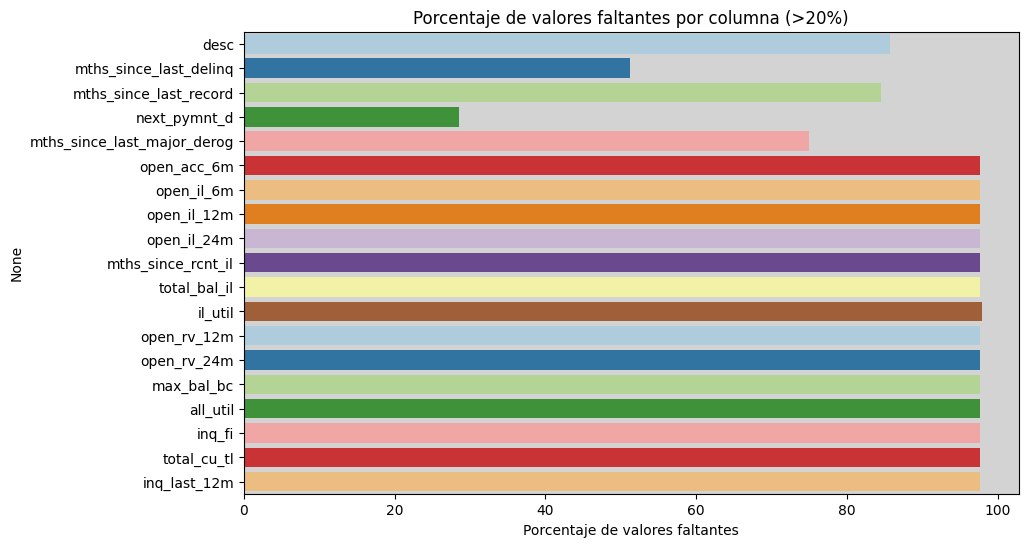

In [ ]:
# Porcentaje de valores nulos en todo el DataFrame
na_percentages = df.isna().mean() * 100

# Seleccionamos columnas con >5% de datos nulos
na_percentages = na_percentages[na_percentages > 20]

# Crear la una figura para visualizar los porcentajes
plt.figure(figsize=(10, 6))

sns.barplot(x=na_percentages.values, y=na_percentages.index, palette='Paired')

plt.xlabel('Porcentaje de valores faltantes')
plt.title('Porcentaje de valores faltantes por columna (>20%)')

plt.gca().set_facecolor('lightgray')

plt.show()

In [ ]:
# Eliminamos las columnas con demasiados nulos (>20%)
columns_to_drop = []

for i in df.columns:

  if df[i].isna().mean()*100 > 20:

    columns_to_drop.append(i)

df.drop(columns=columns_to_drop, inplace=True)

In [ ]:
for i in df.columns:

  print({i: df[i].nunique()})

{'id': 886868}
{'member_id': 886868}
{'loan_amnt': 1372}
{'funded_amnt': 1372}
{'funded_amnt_inv': 9856}
{'term': 2}
{'int_rate': 542}
{'installment': 68701}
{'grade': 7}
{'sub_grade': 35}
{'emp_title': 299159}
{'emp_length': 11}
{'home_ownership': 6}
{'annual_inc': 49345}
{'verification_status': 3}
{'issue_d': 103}
{'loan_status': 10}
{'pymnt_plan': 2}
{'url': 886868}
{'purpose': 14}
{'title': 63143}
{'zip_code': 935}
{'addr_state': 51}
{'dti': 4000}
{'delinq_2yrs': 29}
{'earliest_cr_line': 696}
{'inq_last_6mths': 28}
{'open_acc': 77}
{'pub_rec': 32}
{'revol_bal': 73738}
{'revol_util': 1356}
{'total_acc': 135}
{'initial_list_status': 2}
{'out_prncp': 248246}
{'out_prncp_inv': 266137}
{'total_pymnt': 506637}
{'total_pymnt_inv': 506515}
{'total_rec_prncp': 260185}
{'total_rec_int': 324623}
{'total_rec_late_fee': 6181}
{'recoveries': 23055}
{'collection_recovery_fee': 20708}
{'last_pymnt_d': 98}
{'last_pymnt_amnt': 232437}
{'last_credit_pull_d': 103}
{'collections_12_mths_ex_med': 12}
{'

## Eliminación de columnas con pocos datos únicos o datos irrelevantes

Algunas columnas contienen una cantidad excesiva de valores únicos repetidos, por lo que son removidas, en este mismo paso se remueven las columnas que se consideró no contribuyen al análisis

In [ ]:
# Imprimimos las columnas para las cuales hay menos de 10 valores únicos
for i in df.columns:

    if df[i].nunique() < 10:

        print({i: df[i].value_counts()})

{'term': term
36 months    620886
60 months    265982
Name: count, dtype: int64}
{'grade': grade
B    254433
C    245717
A    148184
D    139419
E     70614
F     23022
G      5479
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'pymnt_plan': pymnt_plan
n    886858
y        10
Name: count, dtype: int64}
{'initial_list_status': initial_list_status
f    456703
w    430165
Name: count, dtype: int64}
{'policy_code': policy_code
1.0    886868
Name: count, dtype: int64}
{'acc_now_delinq': acc_now_delinq
0.0     882726
1.0       3865
2.0        208
3.0         28
4.0          7
5.0          3
6.0          1
14.0         1
Name: count, dtype: int64}


In [ ]:
# Removemos las columnas identificadas, además de otras
df.drop(columns=[
                 # Carece de entrada en el diccionario de datos
                 # Todos excepto 10 valores son iguales en esta columna
                 'pymnt_plan',
                 # Carece de entrada en el diccionario de datos
                 # Todos los valores son iguales en esta columna
                 'policy_code',
                 # Número de cuentas para las que el prestador es delincuente
                 # Irrelevante dado el bajo conteo para no-ceros
                 'acc_now_delinq',
                 # Calificación crediticia; se remueve porque se usará subgrade
                 'grade',
                 # Información crediticia previa
                 # No se utiliza a favor de analizar respecto a los ingresos
                 'tot_coll_amt',
                 'tot_cur_bal',
                 'total_rev_hi_lim',
                 # Información personal; fechas, identificadores, dirección, etc.
                 'id',
                 'member_id',
                 'url',
                 'issue_d',
                 'earliest_cr_line',
                 'last_credit_pull_d',
                 'emp_title',
                 'title',
                 'zip_code',
                 'addr_state',
                 'last_pymnt_d'],
        inplace=True)

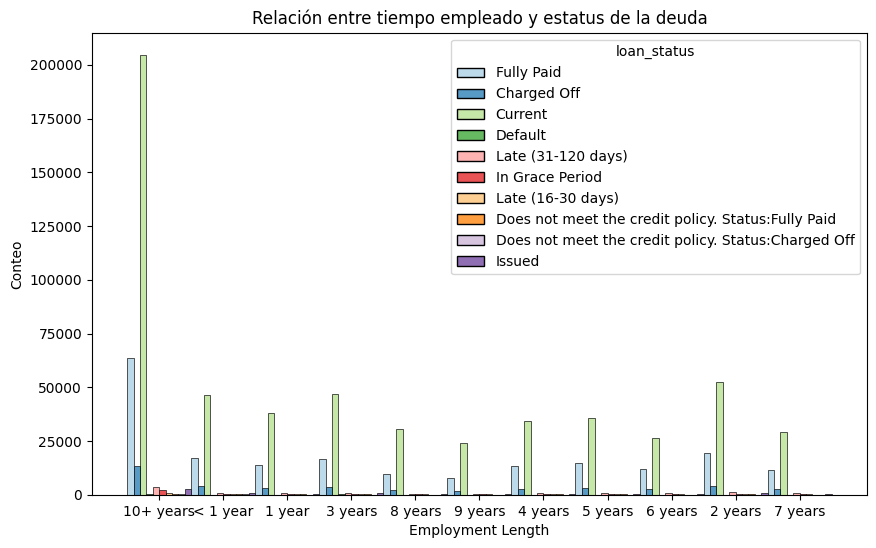

In [ ]:
# Creamos un gráfico para el caso de Employment Length
plt.figure(figsize=(10, 6))

# Create the histogram using Seaborn
sns.histplot(data=df,
             x="emp_length",
             hue="loan_status",
             multiple="dodge",
             palette='Paired')

plt.title("Relación entre tiempo empleado y estatus de la deuda")
plt.xlabel("Employment Length")
plt.ylabel("Conteo")

plt.show()

In [ ]:
df.drop(columns=['emp_length'], inplace=True)

In [ ]:
print('Conteo final de columnas importantes:', len(df.columns))

Conteo final de columnas importantes: 32


## Visualización de features

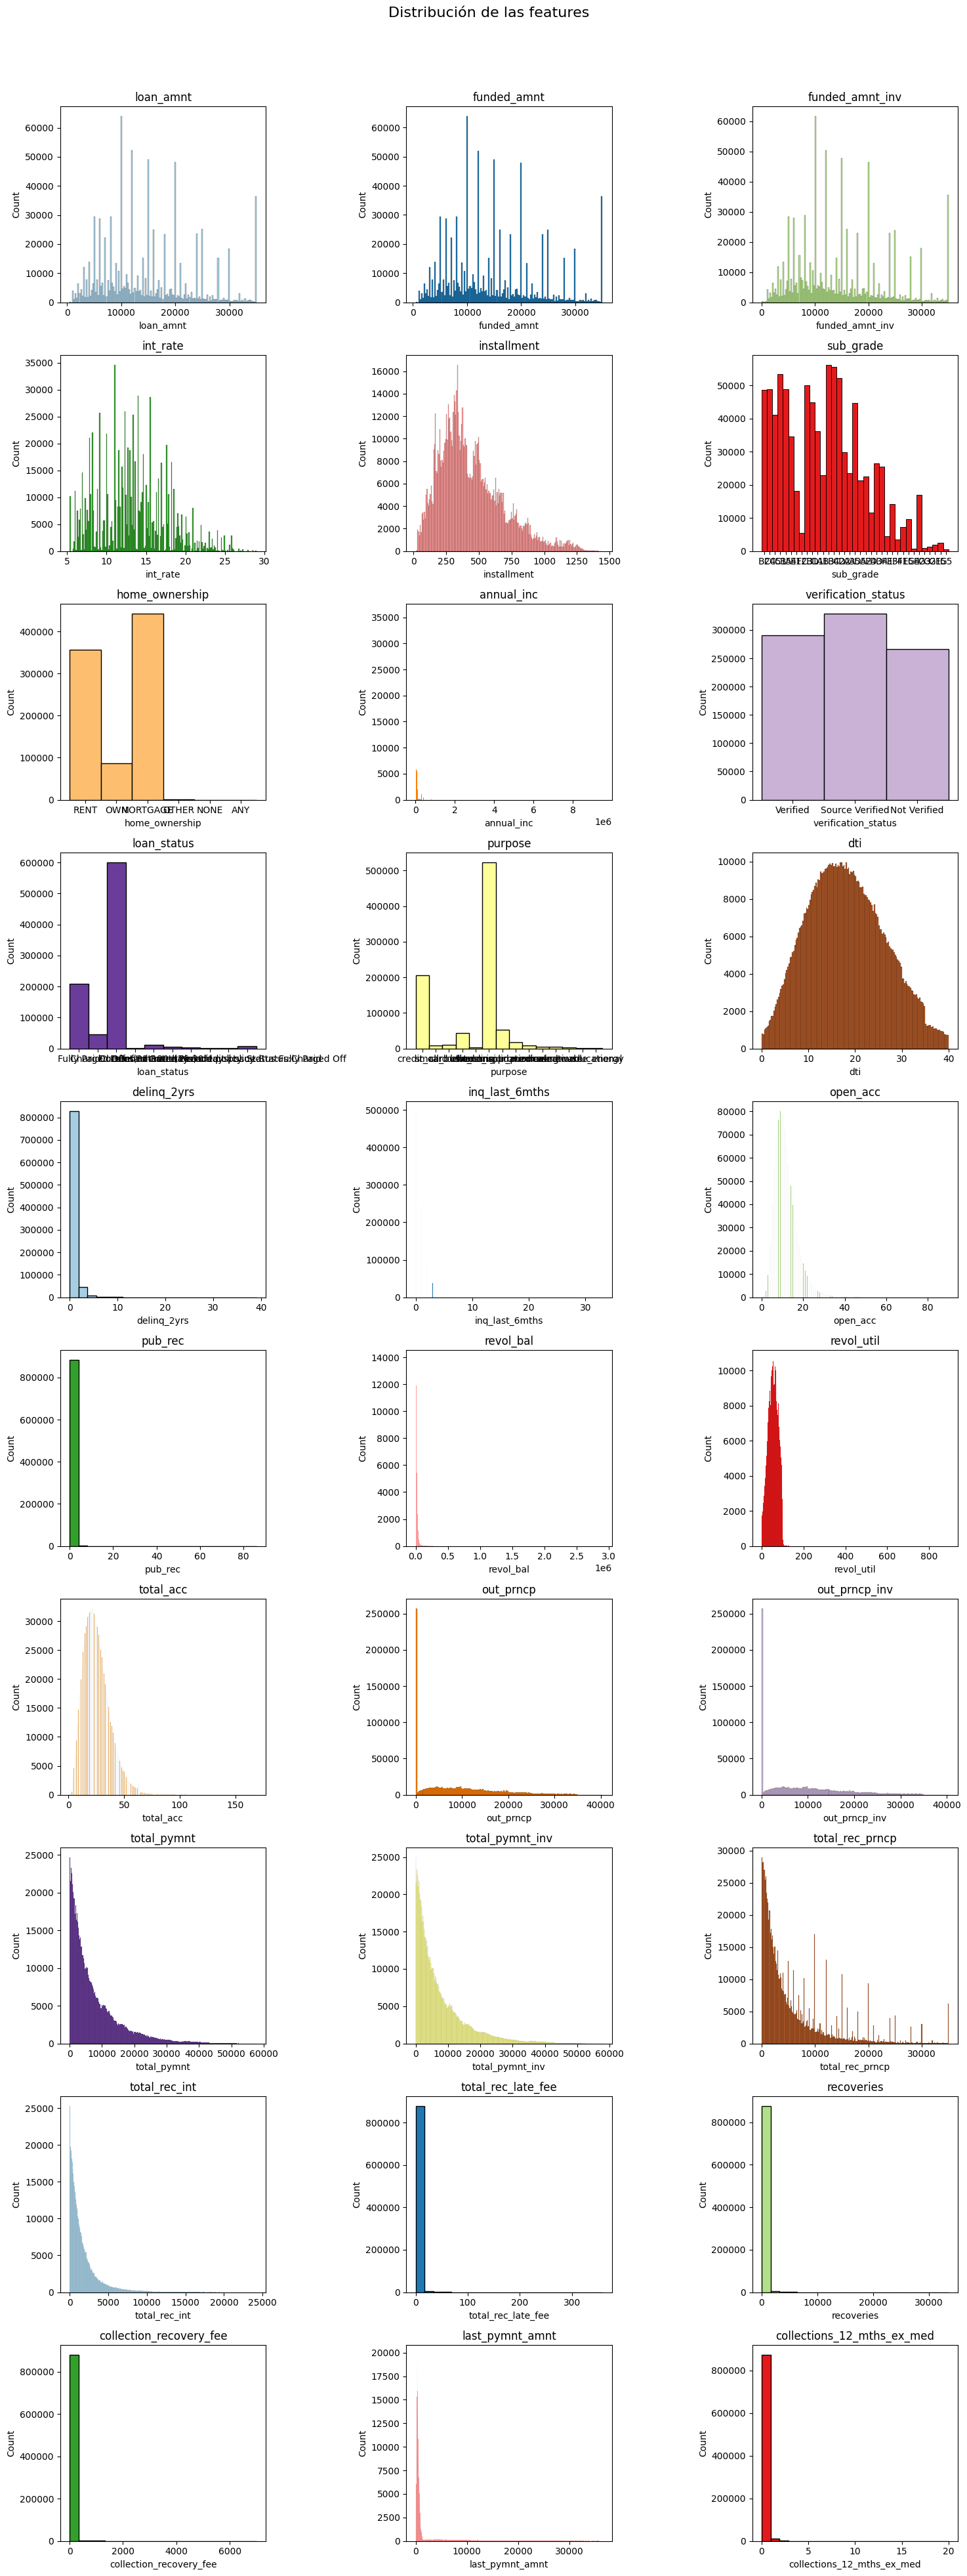

In [ ]:
features = [col for col in df.columns if df[col].nunique() > 2]

# Distribución del gráfico

rows = (len(features) + 2) // 3

cols = 3

fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 4))

axes = axes.flatten()

palette = sns.color_palette('Paired', len(features))

plotted_df = df.copy()

plotted_df['diff_loan_funded'] = plotted_df['loan_amnt'] - plotted_df['funded_amnt']

for i, col in enumerate(features):

    sns.histplot(x=plotted_df[col],
                 kde=False,
                 ax=axes[i],
                 color=palette[i],
                 alpha=1)

    axes[i].set_title(col)

for j in range(i + 1, len(axes)):

    fig.delaxes(axes[j])


fig.suptitle("Distribución de las features", fontsize=16)

# Espacio para el título
plt.tight_layout(rect=[0, 0, 1, 0.96])

plt.show()

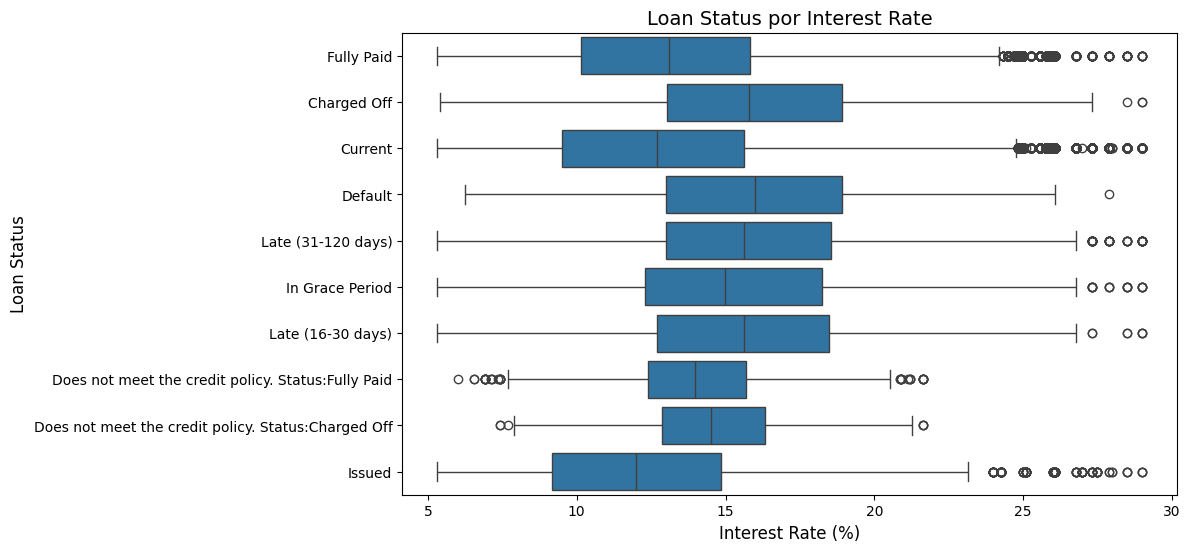

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='int_rate', y='loan_status', data=df)

plt.title('Loan Status por Interest Rate', fontsize=14)

plt.xlabel('Interest Rate (%)', fontsize=12)

plt.ylabel('Loan Status', fontsize=12)

plt.show()

De esta feature, podemos concluir que para tasas de interés más altas, se hacen más comunes las deudas incobrables, y los casos en los que se logra pagar deudas de alto interés completamente son outliers en su categoría

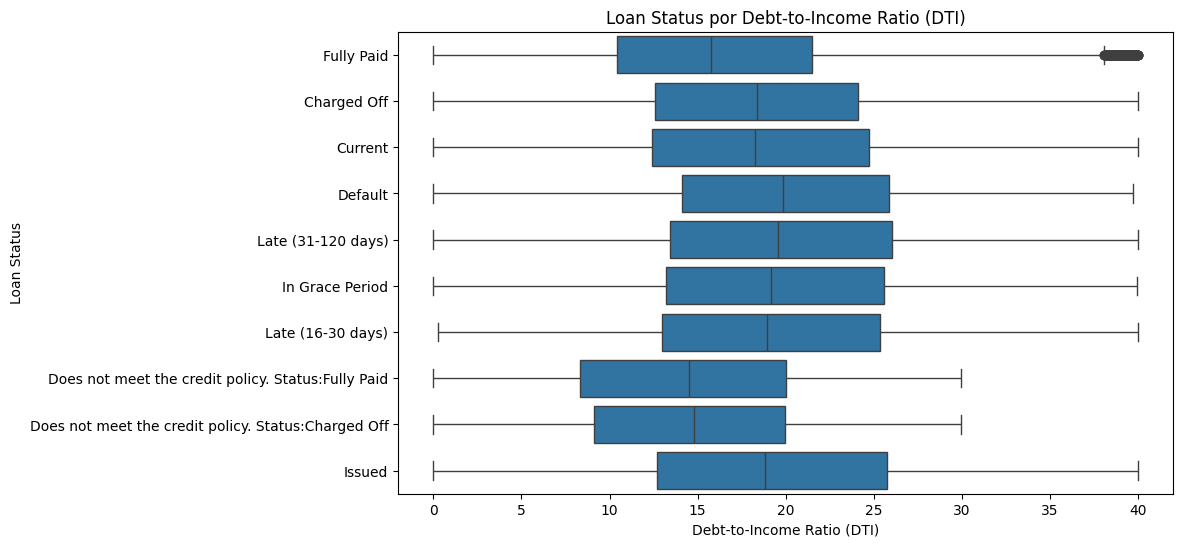

In [ ]:
plt.figure(figsize=(10, 6))

sns.boxplot(x='dti', y='loan_status', data=df)

plt.title('Loan Status por Debt-to-Income Ratio (DTI)')

plt.xlabel('Debt-to-Income Ratio (DTI)')

plt.ylabel('Loan Status')

plt.show()

Del gráfico anterior, podemos ver que hay una relación entre un menor DTI y una mayor capacidad de pagar por completo los préstamos

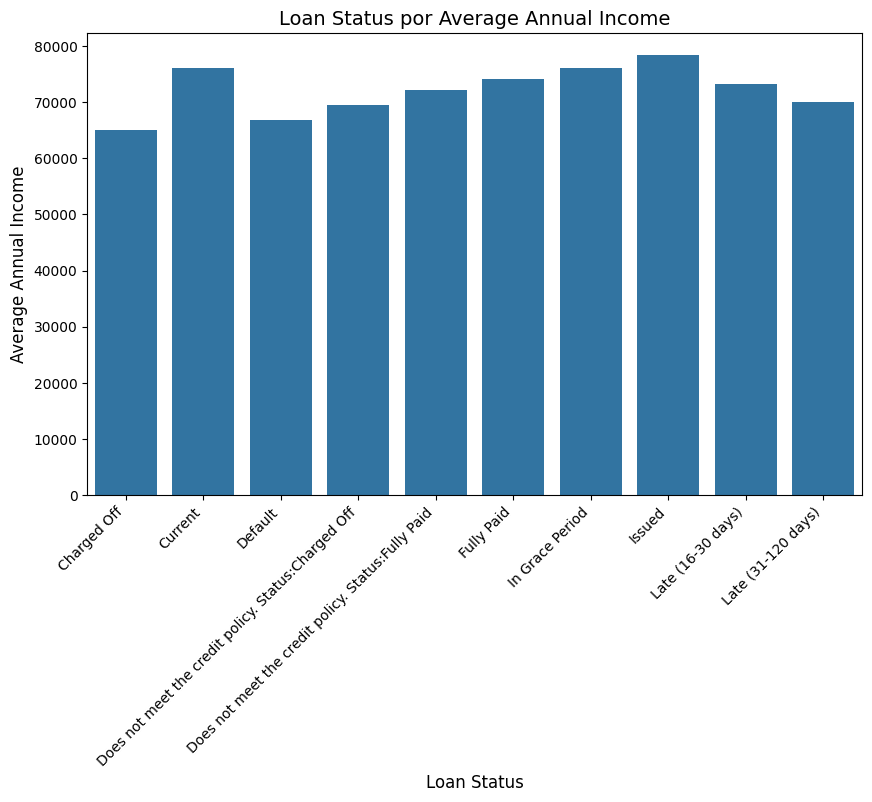

In [ ]:
avg_income = df.groupby('loan_status')['annual_inc'].mean().reset_index()

plt.figure(figsize=(10, 6))

sns.barplot(y='annual_inc',x='loan_status', data=avg_income)

plt.title('Loan Status por Average Annual Income', fontsize=14)

plt.xlabel('Loan Status', fontsize=12)

plt.ylabel('Average Annual Income', fontsize=12)

plt.xticks(rotation=45, ha='right')

plt.show()

De esta feature, podemos ver que existe una diferencia lógica entre promedio de ingresos y si la deuda fue completamente paga o se volvió incobrable, del orden de unos 10.000$ dólares anuales

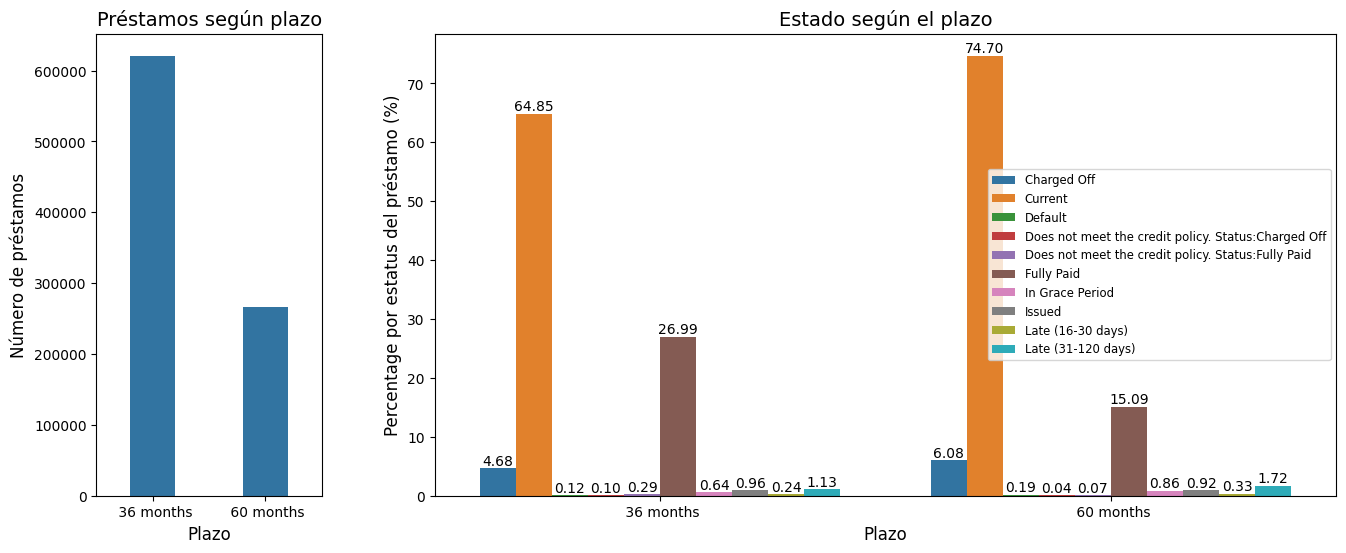

In [ ]:
loans_per_term = df['term'].value_counts().reset_index()


count_data = df.groupby(['term', 'loan_status']).size().reset_index(name='count')

count_data['percentage'] = count_data['count'] / count_data.groupby('term')['count'].transform('sum') * 100


fig = plt.figure(figsize=(16, 6))

gs = gridspec.GridSpec(1, 2, width_ratios=[1, 4])


ax1 = plt.subplot(gs[0])

sns.barplot(x='term', y='count', data=loans_per_term, ax=ax1, width=0.4)

ax1.set_title('Préstamos según plazo', fontsize=14)

ax1.set_xlabel('Plazo', fontsize=12)

ax1.set_ylabel('Número de préstamos', fontsize=12)


ax2 = plt.subplot(gs[1])

sns.barplot(x='term', y='percentage', hue='loan_status', data=count_data, ax=ax2, width=0.8)

for p in ax2.patches:

    height = p.get_height()

    if height > 0:

        ax2.text(

            p.get_x() + p.get_width() / 2.,

            height,

            f'{height:.2f}',

            ha='center',

            va='bottom'

        )

ax2.set_title('Estado según el plazo', fontsize=14)

ax2.set_xlabel('Plazo', fontsize=12)

ax2.set_ylabel('Percentage por estatus del préstamo (%)', fontsize=12)



ax2.legend( fontsize='small')



plt.show()

De este análisis, podemos notar que la mayor cantidad de préstimos se otorgan a menor plazo. Además, podemos ver que, a mayor término, son mayores las deudas incobrables y mucho menores la cantidad de créditos completamente pagos

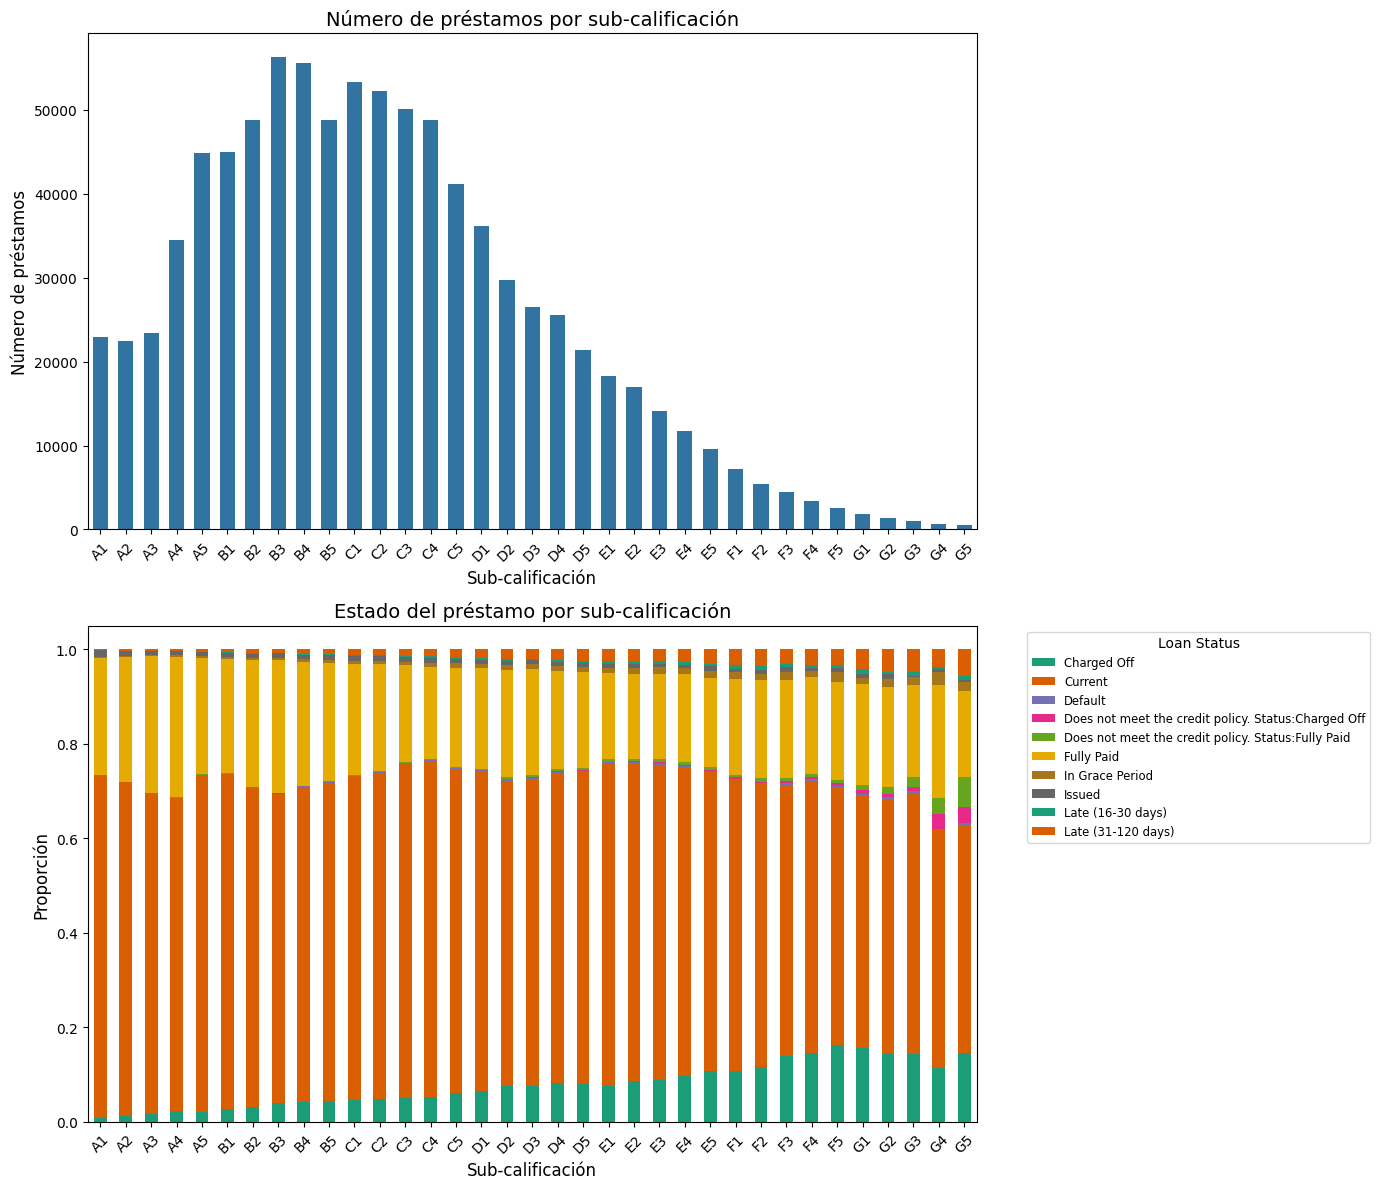

In [ ]:
subgrade_counts = df['sub_grade'].value_counts().sort_index()


subgrade_proportions = df.groupby(['sub_grade', 'loan_status']).size().unstack(fill_value=0)

subgrade_proportions = subgrade_proportions.div(subgrade_proportions.sum(axis=1), axis=0)


fig, axes = plt.subplots(2, 1, figsize=(14, 12))

ax1, ax2 = axes[0], axes[1]


sns.barplot(x=subgrade_counts.index, y=subgrade_counts.values, ax=ax1, width=0.6)

ax1.set_title('Número de préstamos por sub-calificación', fontsize=14)

ax1.set_xlabel('Sub-calificación', fontsize=12)

ax1.set_ylabel('Número de préstamos', fontsize=12)

ax1.tick_params(axis='x', rotation=45)


subgrade_proportions.plot(kind='bar', stacked=True, ax=ax2, color=sns.color_palette('Dark2'))

ax2.set_title('Estado del préstamo por sub-calificación', fontsize=14)

ax2.set_xlabel('Sub-calificación', fontsize=12)

ax2.set_ylabel('Proporción', fontsize=12)

ax2.tick_params(axis='x', rotation=45)

ax2.legend(title='Loan Status', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')


plt.tight_layout()

plt.show()

Este gráfico nos corrobora que a mayor calificación crediticia, la persona es mucho más viable para un crédito

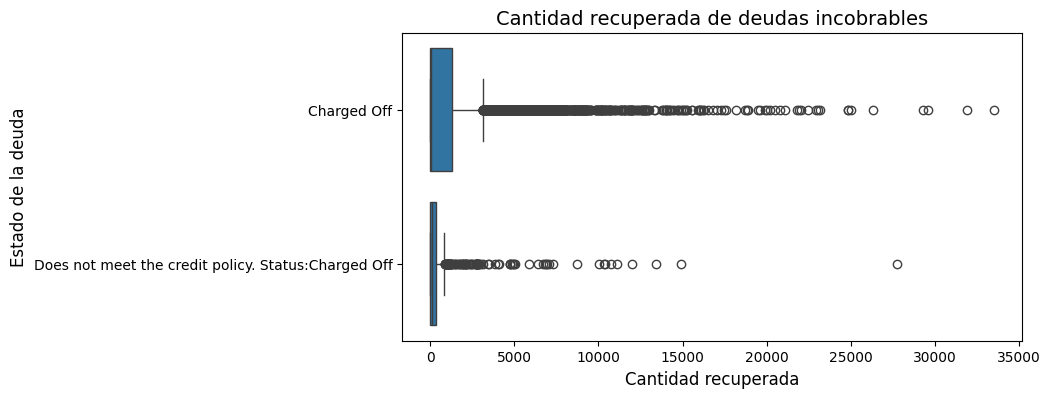

In [ ]:
charges_off_df = df[df['loan_status'].str.contains('Charged Off')]

plt.figure(figsize=(8, 4))

sns.boxplot(x='recoveries', y='loan_status', data=charges_off_df)

plt.title('Cantidad recuperada de deudas incobrables', fontsize=14)

plt.ylabel('Estado de la deuda', fontsize=12)

plt.xlabel('Cantidad recuperada', fontsize=12)

plt.show()

<Figure size 800x1000 with 0 Axes>

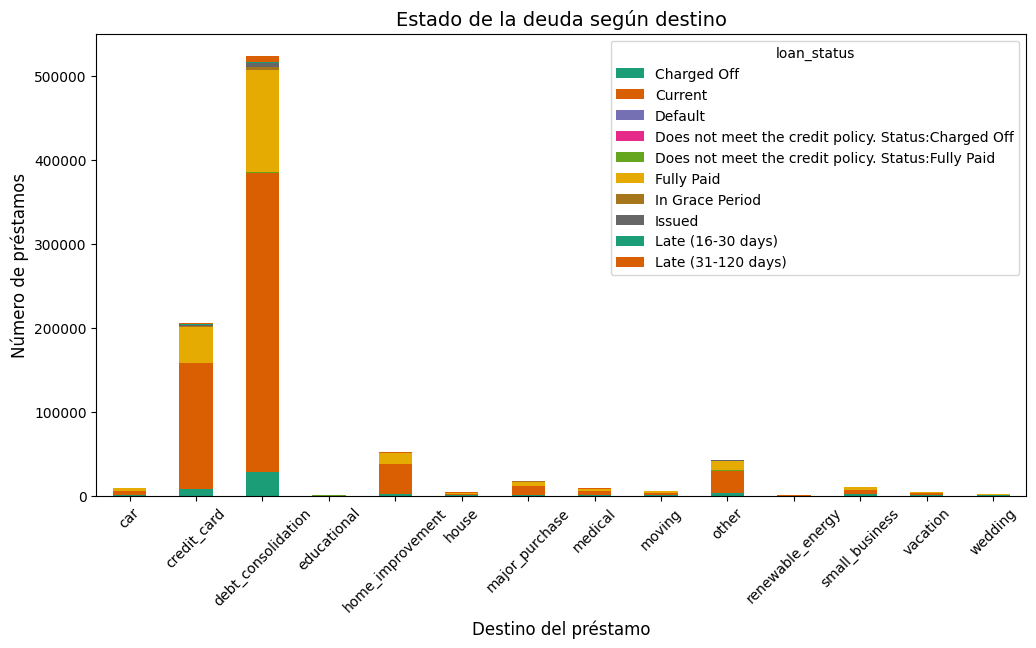

In [ ]:
purpose_status_counts = df.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)

plt.figure(figsize=(8, 10))

purpose_status_counts.plot(kind='bar', stacked=True, figsize=(12, 6), color=sns.color_palette('Dark2'))



plt.title('Estado de la deuda según destino', fontsize=14)

plt.xlabel('Destino del préstamo', fontsize=12)

plt.ylabel('Número de préstamos', fontsize=12)

plt.xticks(rotation=45)



plt.show()


## Encoding

Procesados y analizados los datos, se procede con el encoding de las variables

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
categorical_features.head()

,term,sub_grade,home_ownership,verification_status,purpose,initial_list_status
0,36 months,B2,RENT,Verified,credit_card,f
1,60 months,C4,RENT,Source Verified,car,f
2,36 months,C5,RENT,Not Verified,small_business,f
3,36 months,C1,RENT,Source Verified,other,f
4,60 months,B5,RENT,Source Verified,other,f


In [ ]:
for i in categorical_features.columns:

  print({i: categorical_features[i].value_counts()})

{'term': term
36 months    620886
60 months    265982
Name: count, dtype: int64}
{'sub_grade': sub_grade
B3    56307
B4    55601
C1    53356
C2    52216
C3    50125
C4    48826
B5    48795
B2    48767
B1    44963
A5    44806
C5    41194
D1    36201
A4    34525
D2    29785
D3    26532
D4    25530
A3    23455
A1    22913
A2    22485
D5    21371
E1    18245
E2    16986
E3    14121
E4    11701
E5     9561
F1     7212
F2     5384
F3     4429
F4     3405
F5     2592
G1     1868
G2     1395
G3      979
G4      662
G5      575
Name: count, dtype: int64}
{'home_ownership': home_ownership
MORTGAGE    443203
RENT        355995
OWN          87435
OTHER          182
NONE            50
ANY              3
Name: count, dtype: int64}
{'verification_status': verification_status
Source Verified    329424
Verified           290810
Not Verified       266634
Name: count, dtype: int64}
{'purpose': purpose
debt_consolidation    523881
credit_card           206067
home_improvement       51803
other            

In [ ]:
def sub_grades_encoding(x):
  val = 0

  if 'A' in x:
    val = 7
  elif 'B' in x:
    val = 6
  elif 'C' in x:
    val = 5
  elif 'D' in x:
    val = 4
  elif 'E' in x:
    val = 3
  elif 'F' in x:
    val = 2
  elif 'G' in x:
    val = 1



  if '1' in x:
    val += 0.8
  elif '2' in x:
    val += 0.6
  elif '3' in x:
    val += 0.4
  elif '4' in x:
    val += 0.2
  elif '5' in x:
    val += 0.0

  return val



def verification_status(x):
  if x == 'Not Verified':
    return 0

  return 1

In [ ]:
df['sub_grade'] = df['sub_grade'].apply(sub_grades_encoding)

In [ ]:
df['sub_grade'].unique()

array([6.6, 5.2, 5. , 5.8, 6. , 7.2, 3.8, 2.6, 5.4, 6.8, 4.8, 7.8, 6.4,
       6.2, 5.6, 4.6, 7.4, 7. , 4. , 7.6, 3.2, 4.4, 4.2, 2.4, 3.4, 2.2,
       2.8, 3. , 1.2, 3.6, 1.4, 1.6, 1.8, 2. , 1. ])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['term'] = label_encoder.fit_transform(df['term'])

df['initial_list_status'] = label_encoder.fit_transform(df['initial_list_status'])

In [ ]:
df['verification_status'] = df['verification_status'].apply(verification_status)

In [ ]:
categorical_features = df.select_dtypes(include='object').drop(columns=['loan_status'])

In [ ]:
encoded_features = pd.get_dummies(categorical_features, dtype=int)

encoded_features.head(3)

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
df = pd.concat([df, encoded_features], axis=1)

In [ ]:
df.drop(columns=categorical_features.columns, inplace=True)

In [ ]:
df.head(3)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,sub_grade,annual_inc,verification_status,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding
0,5000.0,5000.0,4975.0,0,10.65,162.87,6.6,24000.0,1,Fully Paid,27.65,0.0,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,171.62,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,2500.0,2500.0,2500.0,1,15.27,59.83,5.2,30000.0,1,Charged Off,1.00,0.0,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,119.66,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2400.0,2400.0,2400.0,0,15.96,84.33,5.0,12252.0,0,Fully Paid,8.72,0.0,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,649.91,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
features = [
    'annual_inc', 'dti','sub_grade', 'open_acc', 'total_acc', 'inq_last_6mths',
    'delinq_2yrs','int_rate', 'pub_rec','home_ownership_ANY','home_ownership_MORTGAGE','home_ownership_NONE','home_ownership_OTHER','home_ownership_OWN','home_ownership_RENT','purpose_car','purpose_credit_card','purpose_debt_consolidation','purpose_educational','purpose_home_improvement','purpose_house','purpose_major_purchase','purpose_medical','purpose_moving','purpose_other','purpose_renewable_energy','purpose_small_business','purpose_vacation','purpose_wedding', 'term','verification_status','installment'
]

In [ ]:
buenos = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']
malos = ['Charged Off', 'Default', 'Does not meet the credit policy. Status:Charged Off']

df['default'] = df['loan_status'].apply(lambda x: 1 if x in malos else 0 if x in buenos else np.nan)
df = df.dropna(subset=['default'])

In [ ]:
df = df[features + ['default']]

In [ ]:
df.head(3)

,annual_inc,dti,sub_grade,open_acc,total_acc,inq_last_6mths,delinq_2yrs,int_rate,pub_rec,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term,verification_status,installment,default
0,24000.0,27.65,6.6,3.0,9.0,1.0,0.0,10.65,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,162.87,0.0
1,30000.0,1.00,5.2,3.0,4.0,5.0,0.0,15.27,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,59.83,1.0
2,12252.0,8.72,5.0,2.0,10.0,2.0,0.0,15.96,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,84.33,0.0


## Eliminación de datos nulos

Se eliminan las filas que aún tienen datos nulos

In [ ]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(256938, 33)
(256909, 33)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 256909 entries, 0 to 887371
Data columns (total 33 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   annual_inc                  256909 non-null  float64
 1   dti                         256909 non-null  float64
 2   sub_grade                   256909 non-null  float64
 3   open_acc                    256909 non-null  float64
 4   total_acc                   256909 non-null  float64
 5   inq_last_6mths              256909 non-null  float64
 6   delinq_2yrs                 256909 non-null  float64
 7   int_rate                    256909 non-null  float64
 8   pub_rec                     256909 non-null  float64
 9   home_ownership_ANY          256909 non-null  int64  
 10  home_ownership_MORTGAGE     256909 non-null  int64  
 11  home_ownership_NONE         256909 non-null  int64  
 12  home_ownership_OTHER        256909 non-null  int64  
 13  home_ownership_OWN 

# Creación y ejecución de la ANN

Con los datos preprocesados, encodeados y analizados, se lleva a cabo el split del dataset y la feature reduction:

## ANN

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

Epoch 1/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6055 - loss: 0.6931 - val_accuracy: 0.6357 - val_loss: 0.6388 - learning_rate: 0.0010
Epoch 2/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6374 - loss: 0.6394 - val_accuracy: 0.6387 - val_loss: 0.6361 - learning_rate: 0.0010
Epoch 3/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6400 - loss: 0.6341 - val_accuracy: 0.6380 - val_loss: 0.6352 - learning_rate: 0.0010
Epoch 4/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6392 - loss: 0.6353 - val_accuracy: 0.6391 - val_loss: 0.6355 - learning_rate: 0.0010
Epoch 5/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.6442 - loss: 0.6326 - val_accuracy: 0.6402 - val_loss: 0.6344 - learning_rate: 0.0010
Epoch 6/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6413 - loss: 0.6344 - val_accuracy: 0.6379 - val_loss: 0.6350 - learning_rate: 0.0010
Epoch 7/100
827/827 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6441 - loss: 0

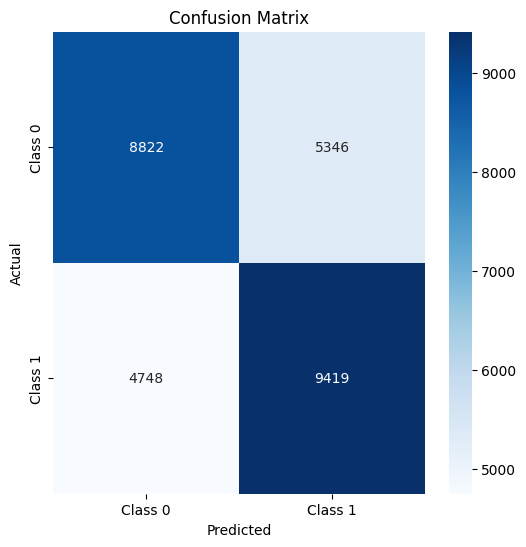

In [ ]:
# Separar variables independientes y dependientes
X = df.drop(columns=['default'])
y = df['default']

# Balancear la cantidad de datos de cada clase
class_counts = y.value_counts()
minority_class_count = class_counts.min()

df_balanced = pd.concat([
    df[df['default'] == 0].sample(n=minority_class_count, random_state=42),
    df[df['default'] == 1]
])

# Separar variables independientes y dependientes después del balanceo
X = df_balanced.drop(columns=['default'])
y = df_balanced['default']

# División de datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y, shuffle=True
)

# Normalización con StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Aplicar PCA con selección óptima de componentes
pca = PCA()
pca.fit(x_train)
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)
n_components_optimal = np.argmax(cumulative_variance_ratio >= 0.95) + 1  # 95% de varianza

pca = PCA(n_components=n_components_optimal)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Calcular class weights
y_train_np = np.array(y_train)  # Convertir a numpy para evitar problemas
class_weights = compute_class_weight('balanced', classes=np.unique(y_train_np), y=y_train_np)
class_weight_dict = dict(enumerate(class_weights))

# Definir la arquitectura del modelo
model = keras.Sequential([
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.BatchNormalization(),  # Normalización por lotes
    layers.Dropout(0.2),  # Dropout para regularización

    # Segunda capa densa con 64 neuronas
    layers.Dense(64, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Tercera capa densa con 32 neuronas
    layers.Dense(32, activation="relu"),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    # Capa de salida con 1 neurona (para clasificación binaria)
    layers.Dense(1, activation="sigmoid")
])

# Optimizador con decay en learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compilar el modelo
model.compile(
    optimizer=optimizer,
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Entrenar el modelo
history = model.fit(
    x_train_pca, y_train,
    epochs=100,
    batch_size=64,
    validation_split=0.2,
    class_weight=class_weight_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluación
loss, accuracy = model.evaluate(x_test_pca, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predicciones y ajuste de umbral
y_pred_prob = model.predict(x_test_pca, verbose=0)
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Ajuste dinámico del umbral
def optimal_threshold(y_true, y_probs):
    from sklearn.metrics import precision_recall_curve
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_probs)
    f1_scores = (2 * precisions * recalls) / (precisions + recalls + 1e-8)
    return thresholds[np.argmax(f1_scores)]

threshold = 0.5
y_pred_adjusted = (y_pred_prob >= threshold).astype(int)

# Reporte de métricas
report = classification_report(y_test, y_pred_adjusted, target_names=['Class 0', 'Class 1'])
print(report)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred_adjusted)
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


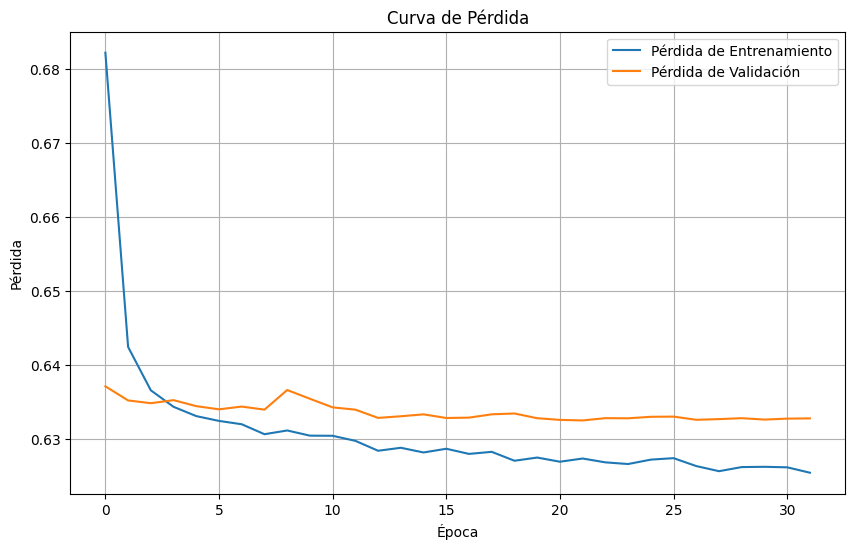

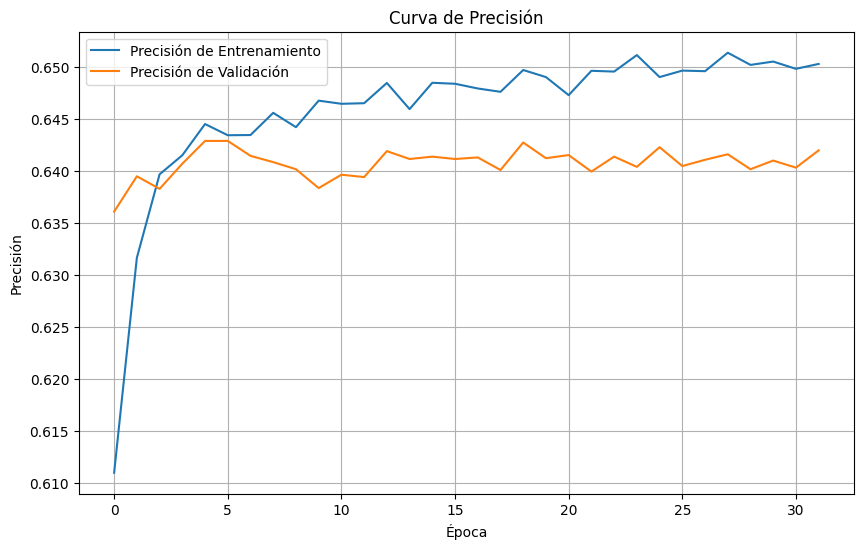

In [ ]:
# 2. Curvas de Pérdida
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida de Validación')
plt.title('Curva de Pérdida')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.grid(True)
plt.show()

# 3. Curvas de Precisión
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
plt.title('Curva de Precisión')
plt.xlabel('Época')
plt.ylabel('Precisión')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
import tensorflow as tf

# Save the model
model.save('loan_model.keras')

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

# Cargar el modelo
model = keras.models.load_model("loan_model.keras")

In [ ]:
import numpy as np

# Cargar nuevos datos (por ejemplo, un solo ejemplo)
nuevo_dato = np.array([[250000000,8.72,5.0,2.0,10.0,2.0,0.0,15.96,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,84.33]])
 # Ajusta según las características de entrada

# Aplicar la misma normalización
nuevo_dato = scaler.transform(nuevo_dato)

# Aplicar PCA
nuevo_dato_pca = pca.transform(nuevo_dato)

# Realizar la predicción
probabilidad = model.predict(nuevo_dato_pca)
umbral = 0.5  # Se puede ajustar según el problema
prediccion = (probabilidad >= umbral).astype(int)  # Usar el mismo umbral ajustado

print(f"Probabilidad: {probabilidad[0][0]:.4f}")
print(f"Predicción: {'Clase 1' if prediccion[0][0] == 1  else 'Clase 0'}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step
Probabilidad: 0.0000
Predicción: Clase 0
